In this file I perform:
* Granger causality test
* SVR performance test

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('full_clean.csv', parse_dates=['date_'])

In [3]:
data.columns

Index(['date_', 'ticker', 'open', 'high', 'low', 'close', 'vol', 'max_comp',
       'max_neg', 'max_neu', 'max_pos', 'min_comp', 'min_neg', 'min_neu',
       'min_pos', 'std_comp', 'std_neg', 'std_neu', 'std_pos', 'mean_comp',
       'mean_neg', 'mean_neu', 'mean_pos', 'median_comp', 'median_neg',
       'median_neu', 'median_pos', 'count'],
      dtype='object')

In [18]:
cmp_ticker = 'AMZN'
data = data[data['ticker'] == cmp_ticker].copy()
data['diffs'] = data.close.diff()
# drop 1 NaN value
data = data.dropna()

<AxesSubplot:xlabel='diffs', ylabel='Count'>

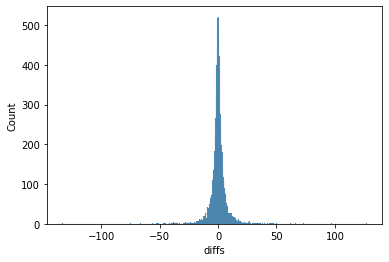

In [50]:
sns.histplot(data, x='diffs')


<AxesSubplot:xlabel='diffs', ylabel='Count'>

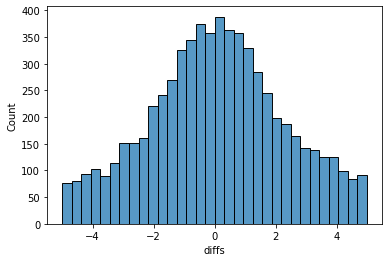

In [11]:
diffs_no_outliers = data[(data['diffs']>-5) & (data['diffs']<5)].copy()

sns.histplot(diffs_no_outliers, x='diffs')

<AxesSubplot:xlabel='diffs', ylabel='Count'>

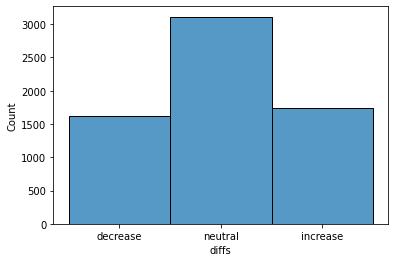

In [45]:
# data distribution for 3 bins without outliers
x = pd.cut(diffs_no_outliers.diffs, bins=[-100, -1.4, 1.4, 100], labels=['decrease', 'neutral', 'increase'])
sns.histplot(x)

<AxesSubplot:xlabel='diffs', ylabel='Count'>

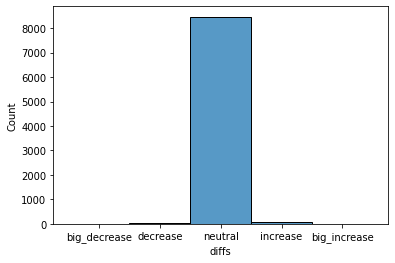

In [62]:
# data distribution for 5 bins without outliers
x, bins_5 = pd.cut(data.diffs, bins=5, labels=['big_decrease','decrease', 'neutral', 'increase', 'big_increase'] ,retbins=True)
sns.histplot(x)

In [63]:
print(bins_5)

[-133.6306348  -81.24304    -29.11608     23.01088     75.13784
  127.2648   ]


In [54]:
diff_in_len = len(data)-len(diffs_no_outliers)
print(diff_in_len, round(diff_in_len/len(data)*100, 2))

2137 24.81


In [87]:
data['bin_2'] = pd.cut(data.diffs, bins=[-1000, 0, 1000], labels=['decrease', 'increase'])
data['bin_3'] = pd.cut(data.diffs, bins=[-1000, -2, 2, 1000], labels=['decrease', 'neutral', 'increase'])
data['bin_5'] = pd.cut(data.diffs, bins=[-1000, -7, -1.5, 1.5, 7, 1000], labels=['big_decrease','decrease', 'neutral', 'increase', 'big_increase'])

<AxesSubplot:xlabel='bin_5', ylabel='Count'>

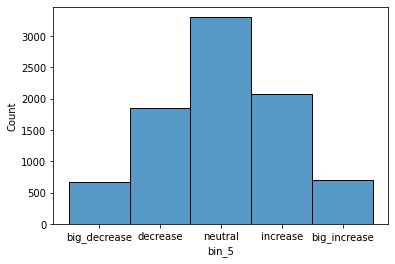

In [89]:
sns.histplot(data=data, x='bin_5')

In [91]:
data.bin_5.value_counts(normalize=True)

neutral         0.383722
increase        0.240567
decrease        0.215024
big_increase    0.081969
big_decrease    0.078718
Name: bin_5, dtype: float64

In [92]:
data.to_csv('data_binned.csv', index=False)